In [4]:
from frame_classification_process import frame_process
from keras.utils import to_categorical
import numpy as np
import os

%load_ext autoreload
%autoreload 2
%matplotlib inline


# curr_path = os.getcwd()
# x_train_ind = np.load(curr_path+'/datasets/x_train_ind_above400.npy')
# y_train = np.load(curr_path+'/datasets/y_train_mapped_above400.npy')
# num_videos = len(y_train)
# num_classes = len(np.unique(y_train))

 
# num_videos = len(y_train) # parameter setting
# if num_videos > len(y_train) or None: 
#     num_videos = len(y_train)

    
# x_train_ind = x_train_ind[:num_videos]
# y_train = to_categorical(y_train[:num_videos], num_classes=num_classes)

# size = (64,64,3)
# fp = frame_process(num_videos, size = size)
# X_train = fp.process_updates_frameSeq_stacked(x_train_ind, y_train, 10, "c3d_X_train")


#### load X ####

curr_path = os.getcwd()
X_train = np.load("./datasets/X_train_10_64_64_3.npy")
y_train = np.load(curr_path+'/datasets/y_train_mapped_above400.npy')
num_classes = len(np.unique(y_train))
y_train = to_categorical(y_train, num_classes=num_classes)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
print(X_train.shape, y_train.shape)
print (X_train.shape[2:])

(4270, 10, 64, 64, 3) (4270, 10)
(64, 64, 3)


In [ ]:
from models import models
model_path = curr_path + '/saved_model/'
model_name = 'c3d_model'
size = X_train.shape[2:]


c3d = models(num_classes, "c3d", num_frames = 10, lr = 1e-4, reg = 0, size = size)
c3d.load(model_path, model_name, model_name)
c3d.train(X_train, y_train, epochs=5, batch_size=32, validation_split = 0.2, verbose = 1)

# c3d.save(model_path , model_name, model_name)

(10, 80, 80, 3)
(None, 4, 38, 38, 32)
(None, 2, 17, 17, 64)
(None, 1, 7, 7, 128)
(None, 256)
(None, 256)
(None, 10)
Loaded model from disk
Train on 3416 samples, validate on 854 samples
Epoch 1/5
3416/3416 [==============================] - 12s - loss: 2.3386 - acc: 0.1238 - val_loss: 2.2622 - val_acc: 0.1674
Epoch 2/5
1152/3416 [=========>....................] - ETA: 6s - loss: 2.3244 - acc: 0.1424

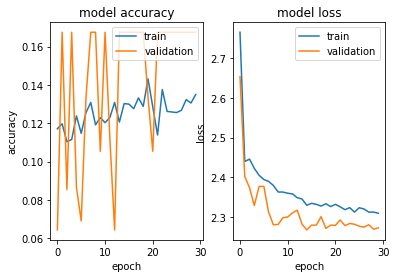

In [19]:
c3d.plot()
